This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Working with Keras: A deep dive

## A spectrum of workflows

## Progressive disclosure of complexity

- Make it easy to get started and build from there
- There is no "True" way of using Keras, there are many ways
- There are different ways to train and build Keras models



## Different ways to build Keras models

- Sequential Model: The most approachable API. It is a python list.
- Functional API: Focuses on graphlike architecturnes. It is a nice midpoint
  between usability and flexibility. It is the most commonly used API
- Model Subclassing: a low level option where you can write everything yourself.
  Much more detail work and risk for mistakes

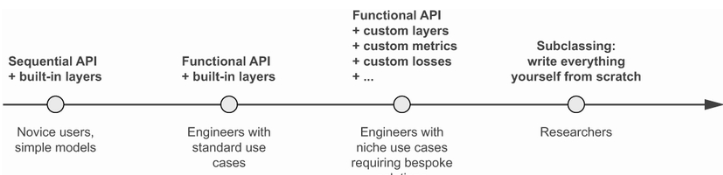

### The Sequential model

**The `Sequential` class**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

2025-05-03 11:10:28.952411: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 11:10:29.033797: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 11:10:29.112515: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746288629.224322   77054 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746288629.249186   77054 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746288629.390947   77054 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

**Incrementally building a Sequential model**

- Note that models don't get "built" until they get data added to them.
- This model is the same as above.

In [3]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

**Calling a model for the first time to build it**

- This can be done by giving it data or specifiying its input shape.

In [4]:
model.build(input_shape=(None, 3))
model.weights

2025-05-03 11:10:35.863518: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


[<Variable path=sequential_1/dense_2/kernel, shape=(3, 64), dtype=float32, value=[[ 0.09189236  0.0485194  -0.22978789  0.07603815 -0.03230011 -0.0241743
   -0.00357336  0.13270742 -0.03276831  0.24993163 -0.1796484   0.11805087
    0.04303348 -0.07933177  0.1566191   0.19772843 -0.26817665 -0.28790691
   -0.13837314  0.1481162  -0.04089755 -0.25068533  0.09463429 -0.18049422
    0.29684222  0.01367408  0.0830721  -0.09228419 -0.16097899 -0.26206467
   -0.19548875  0.2803135  -0.11866468 -0.24989651 -0.19901788  0.28810394
    0.27276444  0.13053441  0.09029767 -0.20030028 -0.14342232 -0.06841156
   -0.17928839  0.2843246   0.16632405  0.15003872 -0.14827707 -0.12895134
    0.2190147   0.0156064   0.23974234 -0.24094255 -0.29542252  0.15147004
    0.13250017  0.24193919 -0.1166935   0.00283778  0.22369123 -0.00375637
   -0.23054132  0.17690045  0.14917684 -0.270637  ]
  [-0.2952854   0.18897286 -0.12128456  0.21309602  0.09951511  0.21982712
    0.28225672 -0.24904263 -0.11821863  0.03

**The summary method**

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

**Naming models and layers with the `name` argument**

Everything can be named in Keras, models, layers, etc.

In [6]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_last_layer (Dense)           │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

**Specifying the input shape of your model in advance**

It is useful to print summaries, but they are not available until the model is
built. You can use the shape argument to to do this. You can do this incrementally
while you build the model to see the structure.

In [7]:
# Build a model specifying the input layer
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [8]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# You can add more layers and summarize
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

### The Functional API

The sequential api is easy to use, but very limited. It can only express models
with a single input and a single output.

#### A simple example

**A simple Functional model with two `Dense` layers**

In [10]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
# This describes the input layer and creates a symbolic tensor
inputs = keras.Input(shape=(3,), name="my_input")

In [12]:
inputs.shape

(None, 3)

In [13]:
inputs.dtype

'float32'

In [14]:
# This is a symbolic hidden layer on top of the inputs
features = layers.Dense(64, activation="relu")(inputs)

In [15]:
features.shape

(None, 64)

In [16]:
# Next we put the output layer on, then create the model
# by feeding the inputs and the symbolic model
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [17]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Multi-input, multi-output models

- Most deep learning models do not look like lists
- The can have multiple inputs and outputs
- You can have multiple outputs like
    - a ticket priority and a predicted department

**A multi-input, multi-output Functional model**

In [18]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

# Define the model inputs
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")


features = layers.Concatenate()([title, text_body, tags]) # Combine the input tensors into a single tensor
features = layers.Dense(64, activation="relu")(features) # Add a hidden dense layer

# Define the model outputs
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

# Define the model
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 10000)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_body           │ (None, 10000)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags (InputLayer)   │ (None, 100)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 20100)     │          0 │ title[0][0],      │
│ (Concatenate)       │                   │            │ text_body[0][0],  │
│                     │                   │            │ tags[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │  1,286,464 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │         65 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department (Dense)  │ (None, 4)         │        260 │ dense_10[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,286,789 (4.91 MB)

 Trainable params: 1,286,789 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

#### Training a multi-input, multi-output model

You train a multi input and multioutput model in much the same way
that you train single input/output models. You pass the inputs in the same 
order that you sent them in the constructor.

**Training a model by providing lists of input & target arrays**

In [19]:
import numpy as np

num_samples = 1280

# Create synthetic input data
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# Create synthetic target data
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

# Compile the model
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])

# Fit the model
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)

# Evaluate the model
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - department_accuracy: 0.2492 - department_loss: 37.9308 - loss: 38.2448 - priority_loss: 0.3140 - priority_mean_absolute_error: 0.4807
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - department_accuracy: 0.2646 - department_loss: 21.9789 - loss: 22.3347 - priority_loss: 0.3558 - priority_mean_absolute_error: 0.5232
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


**Training a model by providing dicts of input & target arrays**

In [20]:
# Similar results can be seen using dictionaries
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - department_accuracy: 0.2397 - department_loss: 34.2131 - loss: 34.5596 - priority_loss: 0.3465 - priority_mean_absolute_error: 0.5109
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - department_accuracy: 0.1139 - department_loss: 8.9988 - loss: 9.3546 - priority_loss: 0.3558 - priority_mean_absolute_error: 0.5232
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


#### The power of the Functional API: Access to layer connectivity

The models created with the functional API can be displayed as a graph

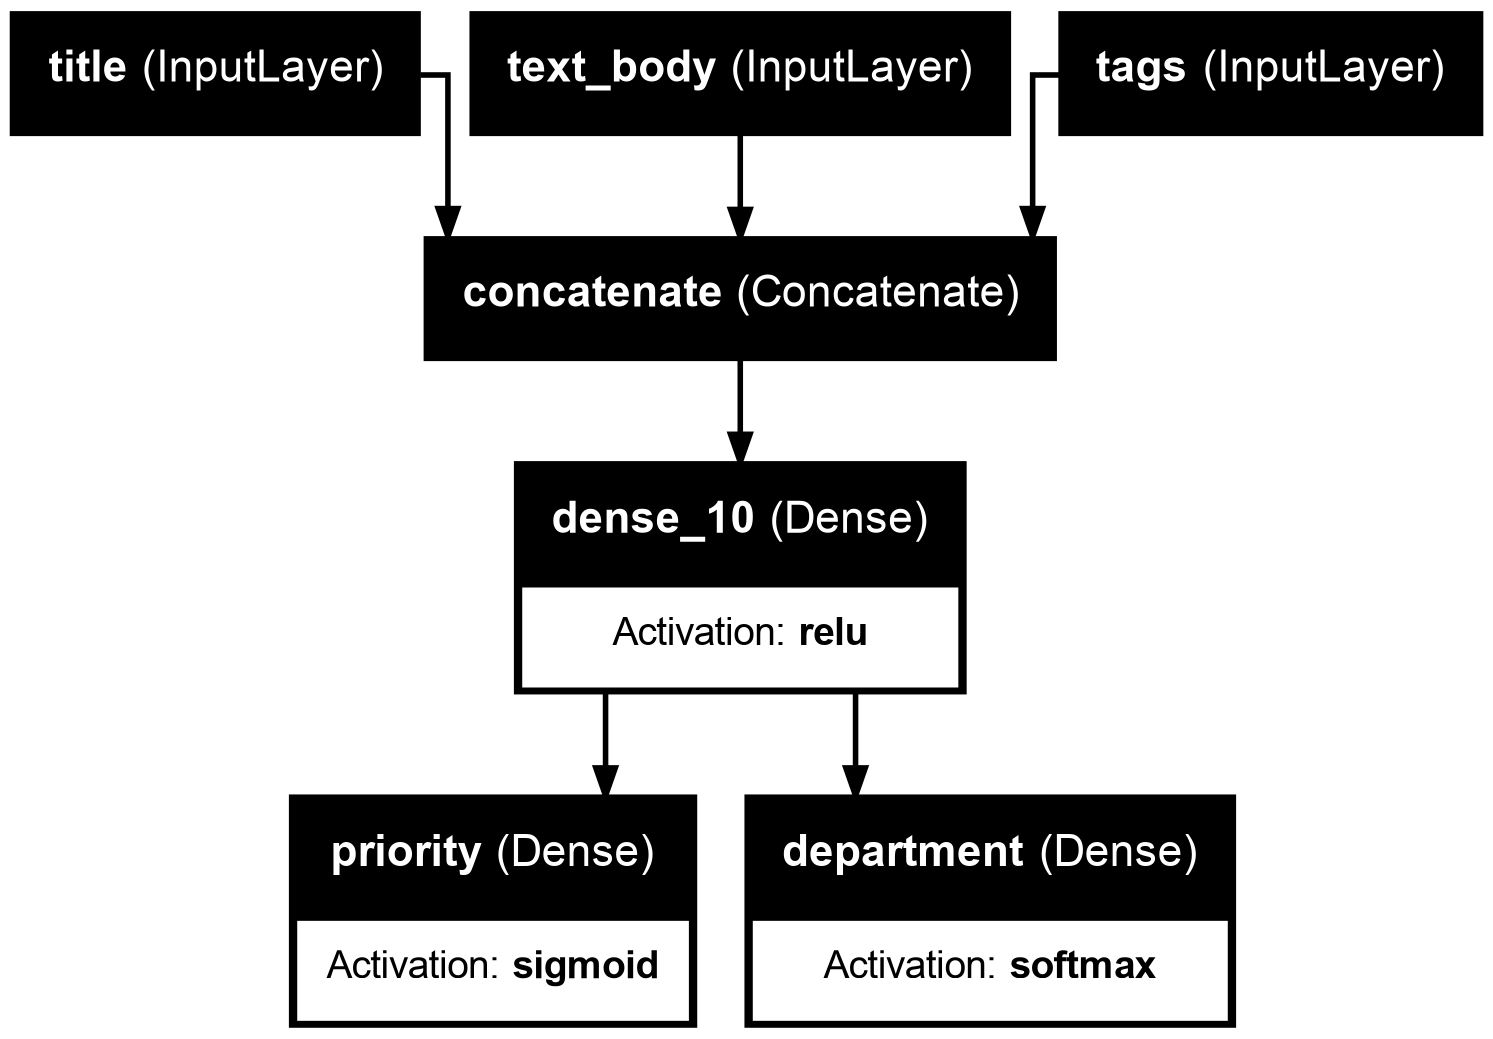

In [21]:
keras.utils.plot_model(model, "ticket_classifier.png", show_layer_names=True, show_layer_activations=True)

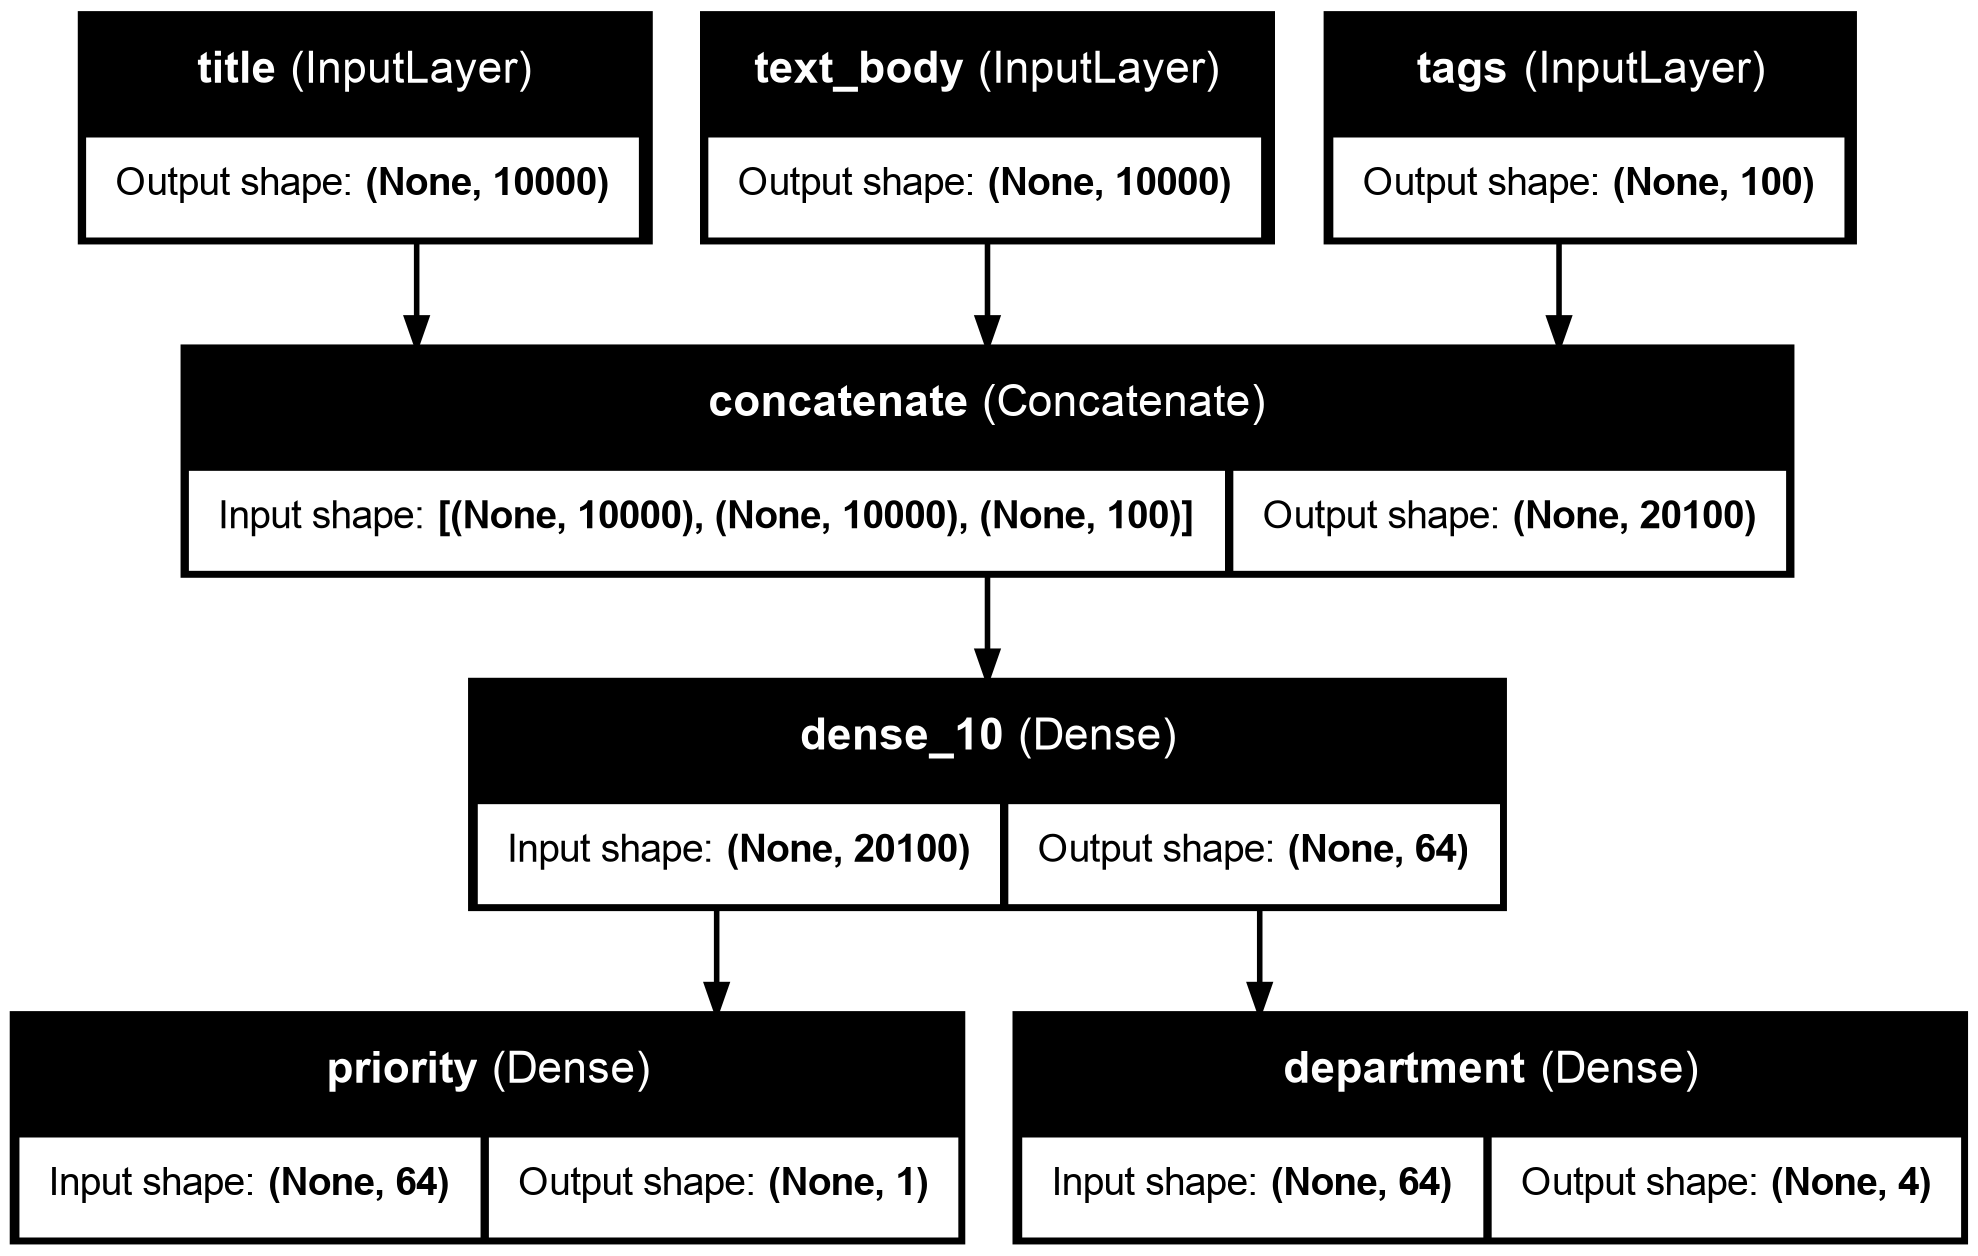

In [22]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True, show_layer_names=True)

**Retrieving the inputs or outputs of a layer in a Functional model**

Access to layers allows you to inspect and reuse nodes in the graph. The
`model.layers` model property provides the list of layers of the model. For each
layer you can query the `layer.input` or `layer.output`. This allows you to do
feature extraction, using features from one model in another model. This means you
do not have to retrain the model from scratch. You can add layers to existing models

In [23]:
# List of Layers
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [24]:
model.layers[3].input

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=False, ragged=False, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=False, ragged=False, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=False, ragged=False, name=tags>]

In [25]:
model.layers[3].output

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, ragged=False, name=keras_tensor_14>

**Creating a new model by reusing intermediate layer outputs**

In [26]:
# Extract the intermediate dense layer
display(model.layers[4].input)
display(model.layers[4].output)
features = model.layers[4].output

# Create the difficulty layer on top
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, ragged=False, name=keras_tensor_14>

<KerasTensor shape=(None, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_15>

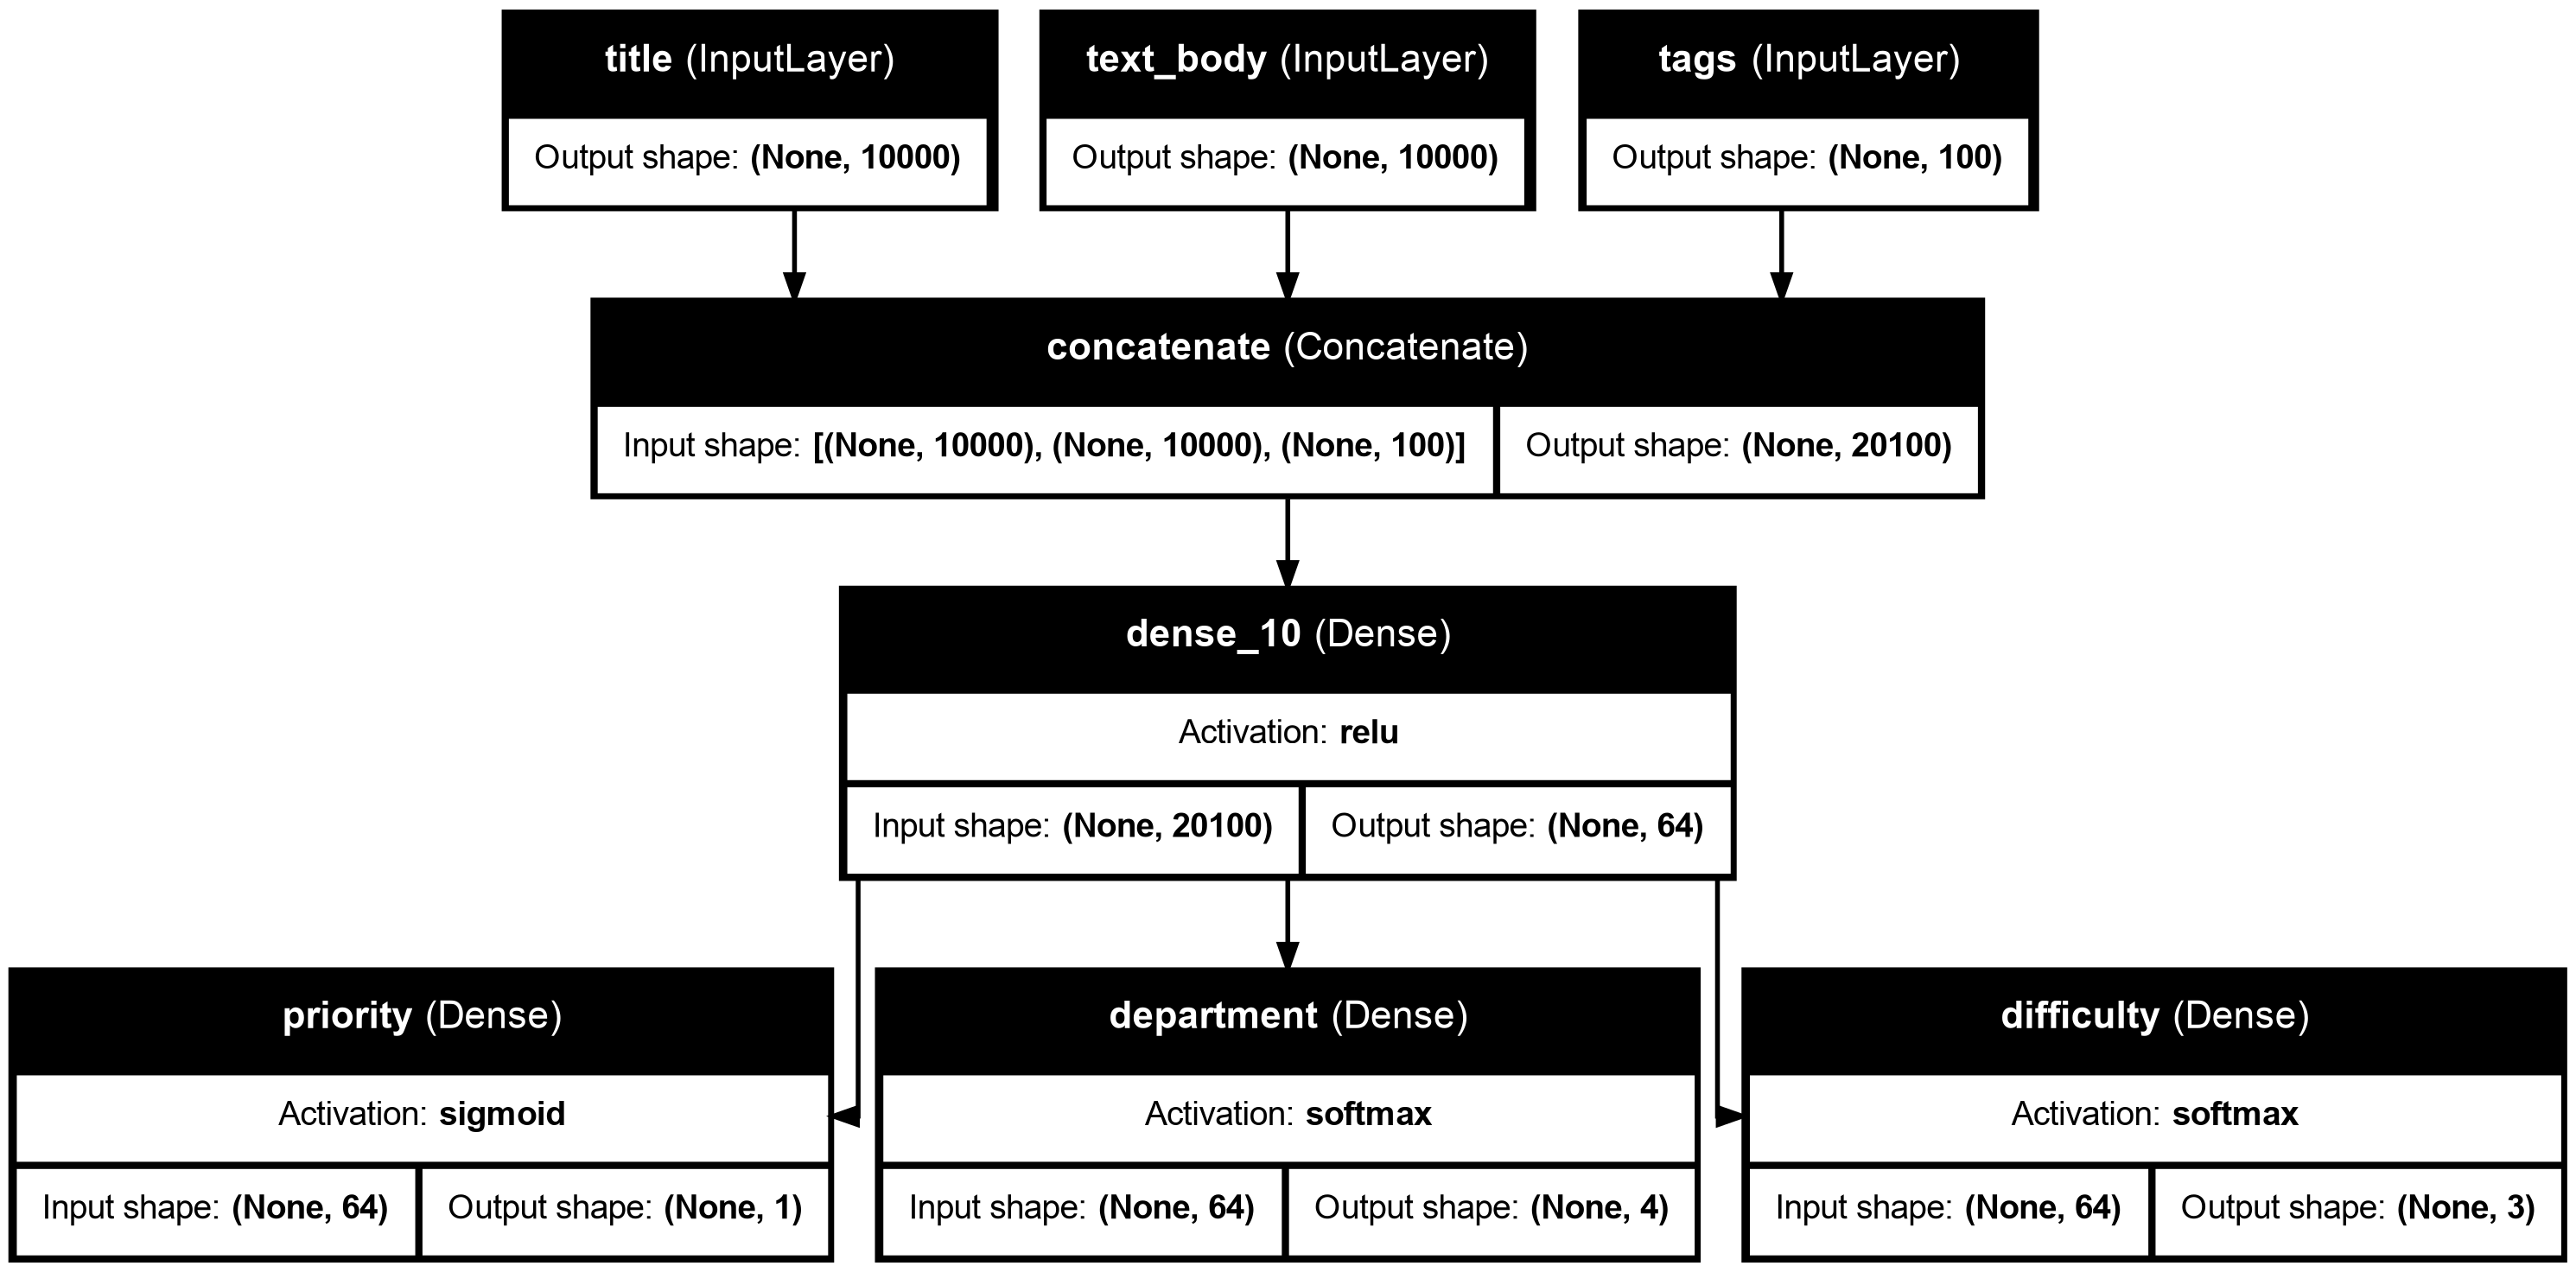

In [27]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True, show_layer_names=True, show_layer_activations=True)

### Subclassing the Model class

In chp 3 we subclassed a layer to completely customize it. Here we will subclass
an entire model. Models have he following:

- `init()` method, define the layers the models will use
- `call()` method, defines the forward pass of the model
- Instantiate your subclass, and call it on data to create its weights

What makes a model different from a layer? A model is the top level object and
has a `fit()`, `evaluate()`, and `predict()`.

#### Rewriting our previous example as a subclassed model

**A simple subclassed model**

In [29]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__() # Call __init__ on keras.Model
        self.concat_layer = layers.Concatenate() # define sublayers
        self.mixing_layer = layers.Dense(64, activation="relu") # define sublayers
        
        # Here we define the output layers
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(num_departments, activation="softmax")

    def call(self, inputs):
        # Here we capture the inputs for processing
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        # Here we define the forward pass
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [0]:
# Here we instantiate the model with the number of departments
model = CustomerTicketModel(num_departments=4)

# Here we call the model and capture the two outputs
priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [30]:
# Here we compile, train, and evaluate the model the model
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - department_accuracy: 0.2638 - department_loss: 45.6427 - loss: 45.9813 - priority_loss: 0.3386 - priority_mean_absolute_error: 0.5048
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - department_accuracy: 0.5801 - department_loss: 20.8462 - loss: 21.2021 - priority_loss: 0.3558 - priority_mean_absolute_error: 0.5232
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


#### Beware: What subclassed models don't support

The `model` subclassing workflow is the most flexible way to build a model.
It lets you build models that cannot be expressed as directed acyclic graphs
of Layers.

`However`, they come with the following drawbacks

- The potential for error is much higher
- Functional and Subclassed models are different in nature
    - A functional model is an explicit data structure which can be viewed, inspected, etc.
    - A subclassed model is bytecode, which makes it so you cannot see into the object as well. You
      cannot use `summary()`, or `plot_model()`.
      

### Mixing and matching different components

Chosing of the the patters, Sequential Model, Functional Model, or Model
subclassing, does not lock you out of the others. There are may options to mix
and match them.

**Creating a Functional model that includes a subclassed model**

In [31]:
# Define a custom classifier
class Classifier(keras.Model):
    # Here we have a classification layer that uses sigmoid
    # if the number of classes is two, otherwise it uses softmax
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    # The call just returns the dense layer
    def call(self, inputs):
        return self.dense(inputs)

# Here we define a sequential model that uses the subclassed model as output
# layer
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**Creating a subclassed model that includes a Functional model**

In [32]:
# Here we define a simple binary functional model
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

# Here is a subclassed model using ia functional model binary_classifier
class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### Remember: Use the right tool for the job

Usually, you can accomodate most use cases with a functional model that includes
subclassed layers. This gives a very high degree of flexibility, while retaining
the advantages of the the functional api

## Using built-in training and evaluation loops

**The standard workflow: `compile()`, `fit()`, `evaluate()`, `predict()`**

- You can customize the metrics
- You can pass callbacks to have certain actions taken

In [33]:
from tensorflow.keras.datasets import mnist

# Create a model
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

# Prepare Train, test, an validation sets
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

# Create, compile, fit, evaluate, and predict
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8644 - loss: 0.4481 - val_accuracy: 0.9581 - val_loss: 0.1452
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9519 - loss: 0.1657 - val_accuracy: 0.9669 - val_loss: 0.1174
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9634 - loss: 0.1321 - val_accuracy: 0.9713 - val_loss: 0.1027
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9700 - loss: 0.1079
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


### Writing your own metrics

**Implementing a custom metric by subclassing the `Metric` class**

To write a custom metric you subclass `keras.metrics.Metric`. Like layers
they have an internal state that is stored as tensorflow variables. However,
they are not updated by backpropogation, so you have to update the state logic
yourself via `updated_state()`.

In [34]:
import tensorflow as tf

# Create the subclass
class RootMeanSquaredError(keras.metrics.Metric):

    # Define the __init__ method. Create the state variables
    # Notice that you have access to add_weight
    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    # Implement the state update logic
    # y_true are the targets for a batch
    # y_pred are the corresponding predictions
    # sample weight is not used here
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    # This is used to return the current value of the metric
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))
    
    # This is to reset the state without reinstantiation
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

Custom metrics can be used just like regular ones.

In [35]:
# Use a custom metric
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8594 - loss: 0.4536 - rmse: 0.4419 - val_accuracy: 0.9582 - val_loss: 0.1442 - val_rmse: 0.2528
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9494 - loss: 0.1745 - rmse: 0.2792 - val_accuracy: 0.9652 - val_loss: 0.1231 - val_rmse: 0.2324
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9617 - loss: 0.1317 - rmse: 0.2431 - val_accuracy: 0.9715 - val_loss: 0.1060 - val_rmse: 0.2118
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9656 - loss: 0.1102 - rmse: 0.2229


### Using callbacks

A callback is an object that is passed to the `fit()` and it is called by the model
at various points during the training. It has access to all the available data about
the state of the model and its performance. It can take actions like interupting
training, save a model, load a different weight set, or otherwise alter the state.

Some examples:

- Model checkpointing
- Early stopping
- Dynamically adjusting the value of certain parameters during training
- Logging during training

Keras has a number of built-in callbacks

- `keras.callbacks.ModelCheckpoint`
- `keras.callbacks.EarlyStopping`
- `keras.callbacks.LearningRateScheduler`
- `keras.callbacks.ReduceLROnPlateau`


#### The EarlyStopping and ModelCheckpoint callbacks

Earlystopping interrupts training once a target metric being monitored stops
improving for a fixed number of epochs. This is typically used in conjunction
with modelcheckpoint to save the model that has achieved the best.

**Using the `callbacks` argument in the `fit()` method**

In [36]:
# Create a list of callbacks to pass
# this uses early stopping and 
# and it saves off the best model
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]

# Here we execute the workflow passing the callbacks
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8662 - loss: 0.4466 - val_accuracy: 0.9584 - val_loss: 0.1385
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9516 - loss: 0.1688 - val_accuracy: 0.9671 - val_loss: 0.1203
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.9630 - loss: 0.1312 - val_accuracy: 0.9734 - val_loss: 0.1017
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9670 - loss: 0.1182 - val_accuracy: 0.9725 - val_loss: 0.1073
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9740 - loss: 0.0955 - val_accuracy: 0.9744 - val_loss: 0.1005
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9739 - loss: 0.0967 - val_accuracy: 0.9759 - val_loss: 0.0982
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9769 - loss: 0.0844 - val_accuracy: 0.9789 - val_loss: 0.0894
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9778 -

In [37]:
# Here we reload the model that we just saved
model = keras.models.load_model("checkpoint_path.keras")

### Writing your own callbacks

**Creating a custom callback by subclassing the `Callback` class**

You can implement any of the following methods

- `on_epoch_begin(epoch, logs)`
- `on_epoch_end(epoch, logs)`
- `on_batch_begin(batch, logs)`
- `on_batch_end(batch, logs)`
- `on_train_begin(logs)`
- `on_train_end(batch, logs)`

The `logs` argument contains a dictionary with information from the previous
batch, epoch, or training run. `on_batch` and `on_epoch` take an integer as
their first argument

In [38]:
from matplotlib import pyplot as plt

# Saves a per-batch loss values during training and saves a graph
# at the end of each epoch
class LossHistory(keras.callbacks.Callback):
    # Initializing the loss log when training begins
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    # Saves the loss at the end of each batch
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    # Creates a plot at the end of each epoch
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8637 - loss: 0.4506 - val_accuracy: 0.9597 - val_loss: 0.1416
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9532 - loss: 0.1616 - val_accuracy: 0.9683 - val_loss: 0.1112
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9645 - loss: 0.1244 - val_accuracy: 0.9746 - val_loss: 0.0970
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9699 - loss: 0.1076 - val_accuracy: 0.9747 - val_loss: 0.0949
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9720 - loss: 0.1010 - val_accuracy: 0.9756 - val_loss: 0.0915
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9738 - loss: 0.0947 - val_accuracy: 0.9750 - val_loss: 0.1002
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9756 - loss: 0.0908 - val_accuracy: 0.9775 - val_loss: 0.0895
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9780 - lo

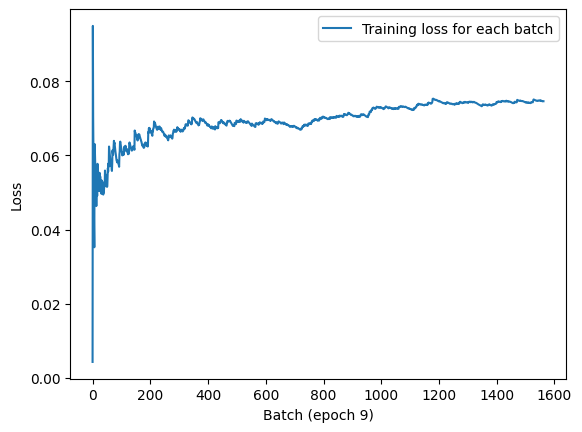

In [39]:
# Here we implement the custom callback
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### Monitoring and visualization with TensorBoard

Tensorboard is a browser based application to watch what is going on with your
model during training. It allows you to:

- Visually monitor metrics during training
- Visualize you model architecture
- Visualize histograms fo activations and gradients
- Explore embeddings in 3D

The easiest way to use tensorboard is with the callback `keras.callbacks.TensorBoard`.

In [40]:
# Here we pass the tensor
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8643 - loss: 0.4507 - val_accuracy: 0.9582 - val_loss: 0.1378
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9538 - loss: 0.1592 - val_accuracy: 0.9644 - val_loss: 0.1182
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9632 - loss: 0.1283 - val_accuracy: 0.9710 - val_loss: 0.1077
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9699 - loss: 0.1076 - val_accuracy: 0.9756 - val_loss: 0.0915
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9712 - loss: 0.0979 - val_accuracy: 0.9747 - val_loss: 0.0933
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9744 - loss: 0.0948 - val_accuracy: 0.9767 - val_loss: 0.0918
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9757 - loss: 0.0868 - val_accuracy: 0.9759 - val_loss: 0.0963
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9784 - los

In [0]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_log_dir

## Writing your own training and evaluation loops

The `fit()` method is only focused on supervised learning, a setup with known
targets. There are other setups where there are no targets, ie, generative AI,
self-supervised learning (targets obtained from inputs), reinforcement learning
(learning is driven by occasional rewards).

A reminder:

- Run the forward pass inside a gradient tap to obtain a loss value for the current
  batch of data
- Retrieve gradients of the loss with regard to the models weights
- Update the model weights so as to lower the loss value on the current batch
  of data

### Training versus inference

It is important to distinguis betweeen training and inference. Some layers, like
Dropout, have different behaviors between training and inference. It is important
to define and use `trainable_weights` as not all weights are updated during
training.

### Low-level usage of metrics

In [41]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


In [42]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


### A complete training and evaluation loop

**Writing a step-by-step training loop: the training step function**

Here we define a full training step with the forward pass, backward pass and
metrics tracking in a fit() like step

In [43]:
# Get the model
model = get_mnist_model()

# Initialize a loss function
loss_fn = keras.losses.SparseCategoricalCrossentropy()
# Initialize the optimizer
optimizer = keras.optimizers.RMSprop()
# Prep a metrics list
metrics = [keras.metrics.SparseCategoricalAccuracy()]
# Prepare a loss tracker
loss_tracking_metric = keras.metrics.Mean()


def train_step(inputs, targets):
    # Run the forward pass
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True) # Note that we are passing training=True
        loss = loss_fn(targets, predictions)
    
    # Run the backward pass
    gradients = tape.gradient(loss, model.trainable_weights) # Note the use of trainable weights
    optimizer.apply_gradients(zip(gradients, model.trainable_weights)) 

    # Keep track of metrics
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    # Keep track of loss average
    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

We have to reset our metrics at the beginning of each epoch, so here is a utility
method.

In [44]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

Note that we turn the numpy dataset to a `tf.data.Dataset`, an interator

In [45]:
# Step by step training loop
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

2025-05-03 17:12:40.387262: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9140
...loss: 0.2923


2025-05-03 17:13:47.238123: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9536
...loss: 0.1610
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9633
...loss: 0.1325


**Writing a step-by-step evaluation loop**

In [46]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9655
...val_loss: 0.1292


2025-05-03 18:03:35.798116: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Make it fast with tf.function

The implementations just made are slow. By default tensorflow is eager. This
is not optimal from a performance standpoint. It is more performant to compile
into a computation graph that can be globally optimized. This can be done easily
by using the `@tf.function` decorator

When you are debugging it is best to run in eager mode. When you are moving to
production you will want to use computation graphs

**Adding a `tf.function` decorator to our evaluation-step function**

In [48]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9655
...val_loss: 0.1292


### Leveraging fit() with a custom training loop

This is a middle ground between vanilla `fit()` and the and a fully custom 
training loop. You can do this by overriding the `train_step` of the Model
class.

An Example:

- Create a new subclass of `keras.Model`
- Override the method `train_step(self, data)
- Implement a `metrics` property that tracks the models metric instance. This
  enables the mode to automatically call `reset_state()` when necessary

**Implementing a custom training step to use with `fit()`**

In [49]:
# Initialize loss function and loss tracker
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

# Create Custom Model
class CustomModel(keras.Model):
    
    # Override the train step
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True) # Use self instead of model
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss) # Update the loss tracker
        return {"loss": loss_tracker.result()} # return the average loss

    @property
    # Reset the metrics
    def metrics(self):
        return [loss_tracker]

In [50]:
# Create the network using the CustomModel
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

# Compile and fit the network
model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.4413
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.1641
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.1351


Notes:

- This pattern does not prevent you from using the functional api. You can do 
  this if you are using the sequential, functional, or subclassed models
- You do not need o use the `@tf.function` decorator when overriding the 
  training step

After you call `compile` you get access to the following:

- `self.compiled_loss` - The loss function you passed to compile
- `self.compiled_metrics - a wrapper fro the list of metrics you passed,
  which allows you to call `self.compiled_metrics.update_status()` to updata
  all metrics at once.


In [52]:
# Create a custom model
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions) # Compute the loss via self.compiled_loss
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions) # Update the metrics
        return {m.name: m.result() for m in self.metrics} # Return a dictionary mapping metric names to current value

In [53]:
# Implement the model
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3


/home/jonathan/Projects/deep_learning_with_python/.venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py:665: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(
/home/jonathan/Projects/deep_learning_with_python/.venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py:640: UserWarning: `model.compiled_metrics()` is deprecated. Instead, use e.g.:
```
for metric in self.metrics:
    metric.update_state(y, y_pred)
```

  return self._compiled_metrics_update_state(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - sparse_categorical_accuracy: 0.8651 - loss: 0.1000
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - sparse_categorical_accuracy: 0.9530 - loss: 0.1000
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - sparse_categorical_accuracy: 0.9627 - loss: 0.1000


## Summary

- Keras offers a spectrum of workflows based on the principle of progressive
  disclosure of complexity. They all work together
- You can build models via the Sequential api, Sequential API, or by model
  subclassing. The functional api is usually the best solution
- The simplest way to train and evaluate the model is via the `fit()` and
  `evaluate()` methods
- Callbacks let you monitor models during training and automatically take
  actions.
- You can take over the `fit()` method by overriding the `train_step()` method
- Beyond `fit()`, you can write your own training loops entirely from scratch